In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data/water_potability.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df = df.drop_duplicates()
df.info()

In [ ]:
df = df.fillna(df.mean())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df["Sulfate"]

In [17]:
columns= df.columns.to_list()

In [18]:
df.groupby("Potability").mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.084658,196.733292,21777.490788,7.092175,334.371700,426.730454,14.364335,66.308522,3.965800
1,7.074754,195.800744,22383.991018,7.169338,332.844122,425.383800,14.160893,66.533513,3.968328


In [19]:
corr_mat = df.corr()

In [26]:
print(corr_mat)

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        

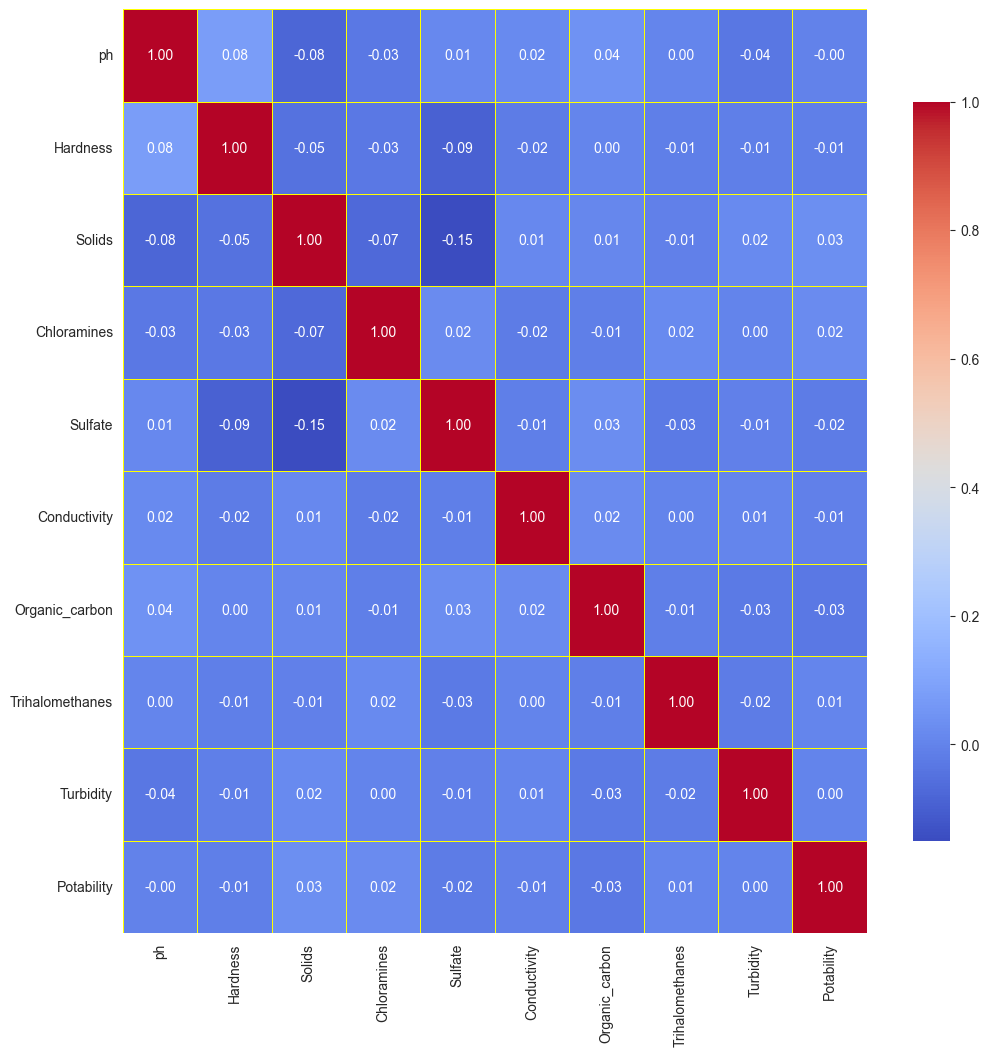

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, cmap="coolwarm", fmt="0.2f", linecolor="yellow", annot=True, linewidths=0.5, cbar_kws={"shrink": .8} )
plt.show()

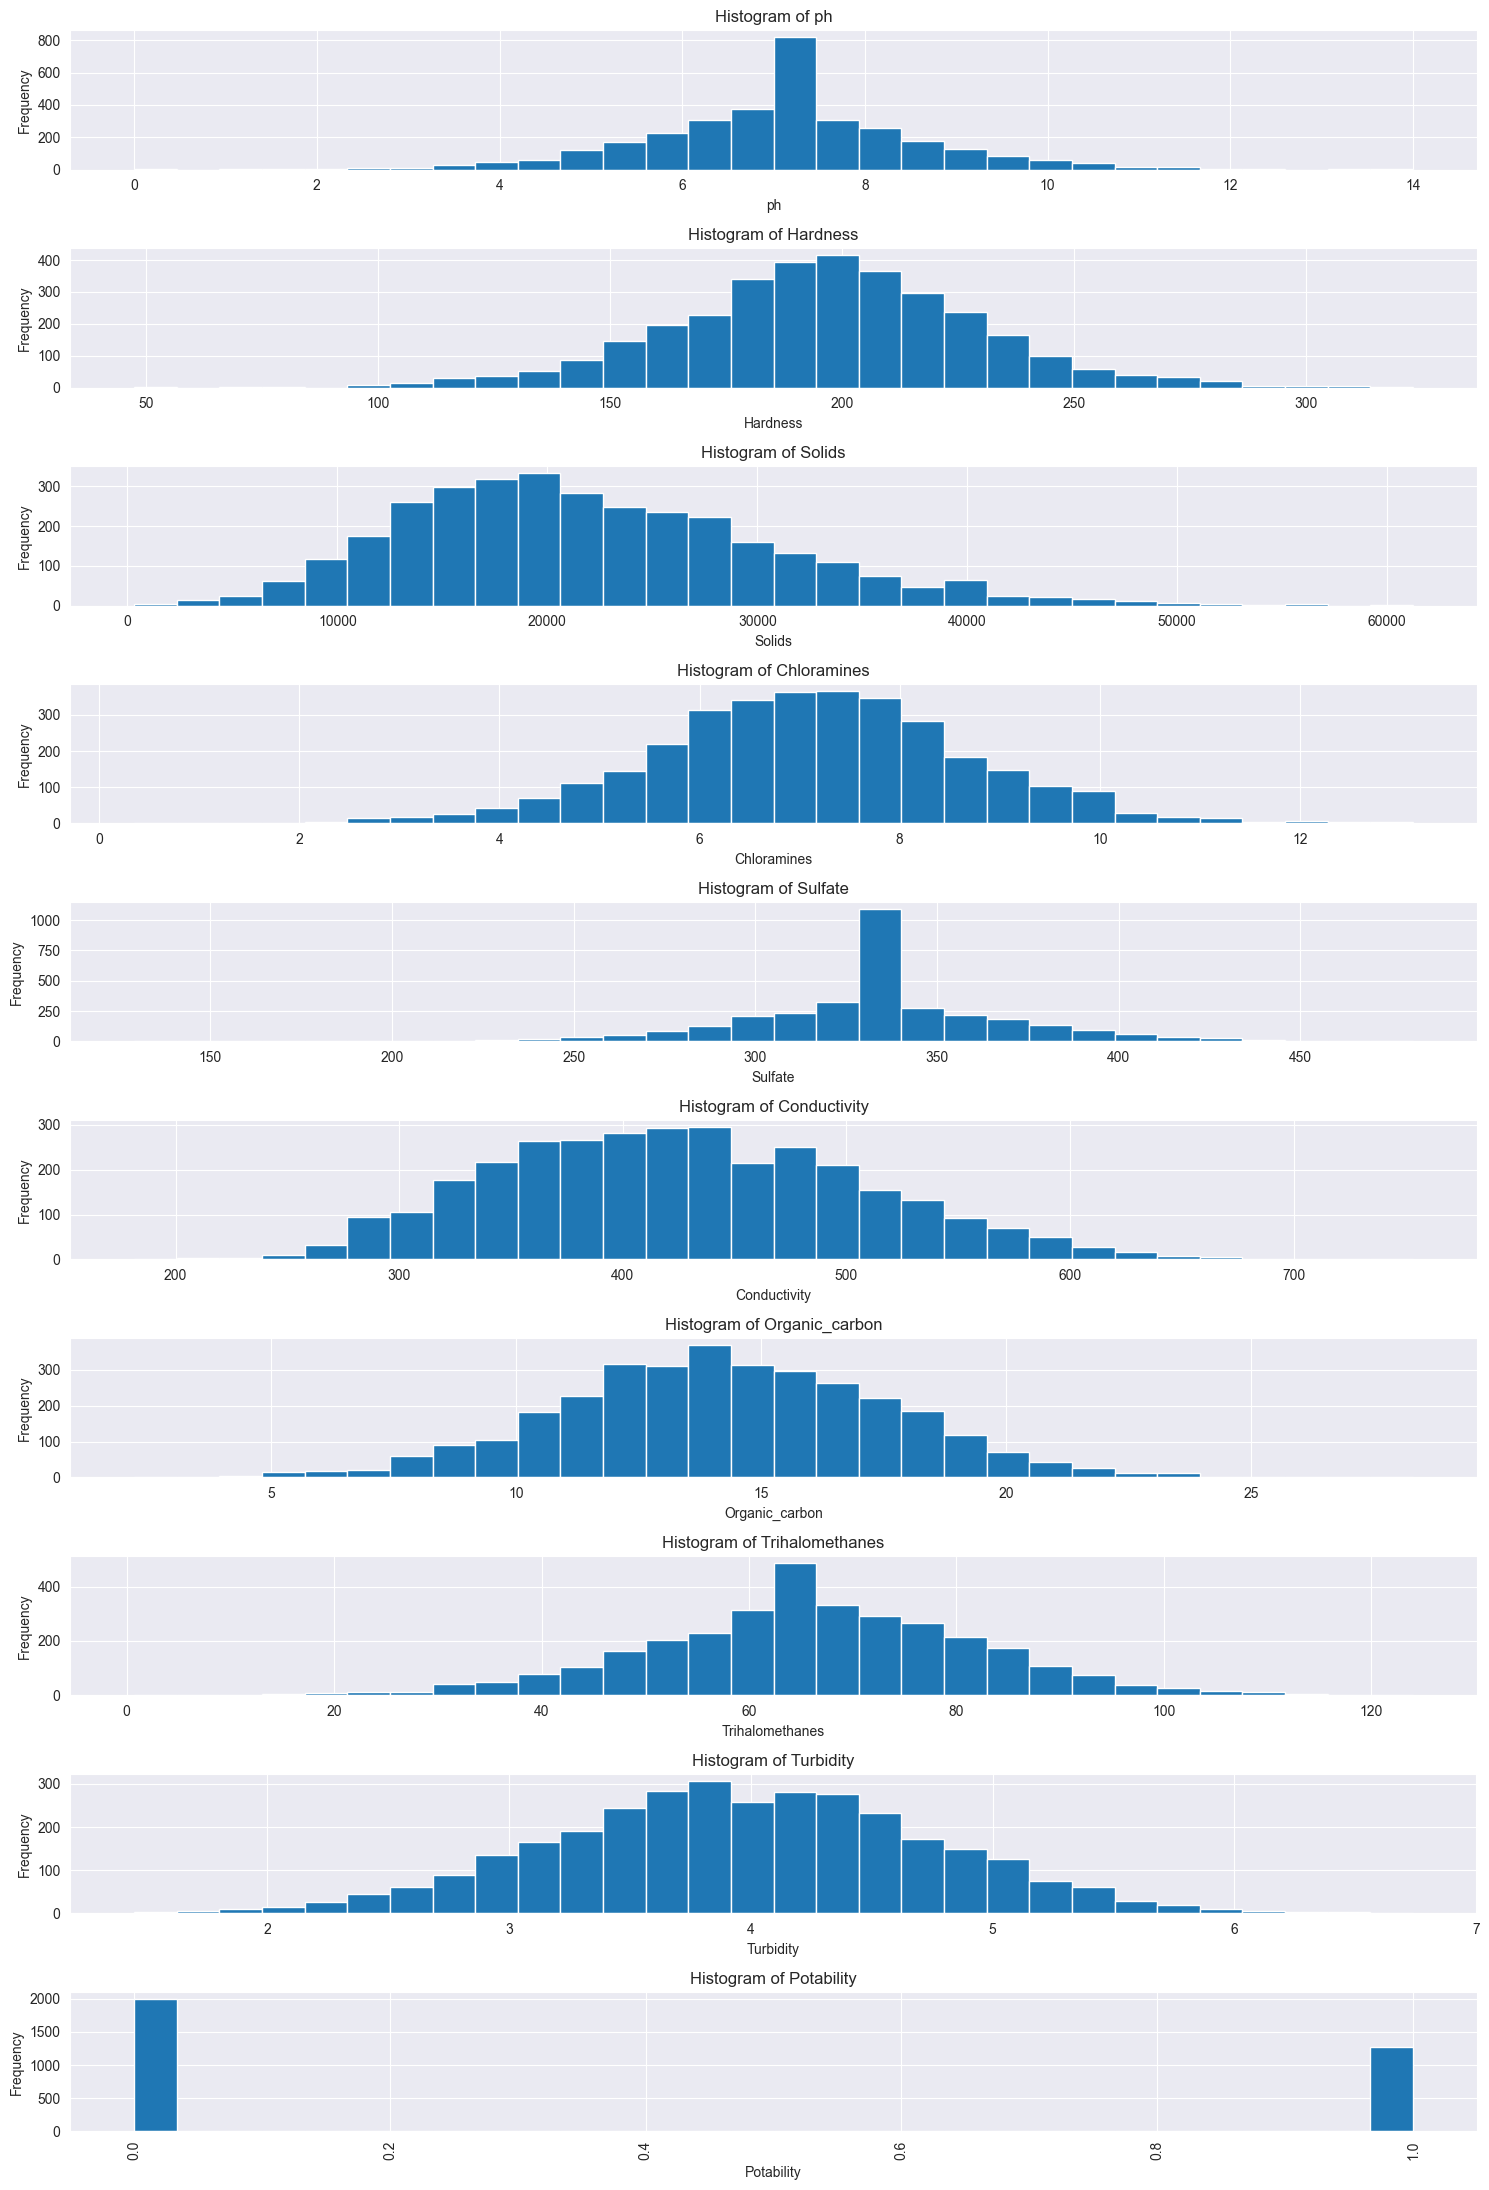

In [28]:
fig, axes = plt.subplots(figsize=(15,22), nrows=len(columns), ncols=1,)
for i, column in enumerate(columns):
    ax = axes[i]  # Use the ith axes for each histogram
    df[column].hist(ax=ax, bins=30)
    ax.set_title(f"Histogram of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.ticklabel_format(style='plain')  # Avoid scientific notation
    plt.xticks(rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

C:\Users\abdss\AppData\Local\Temp\ipykernel_19008\1772460928.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


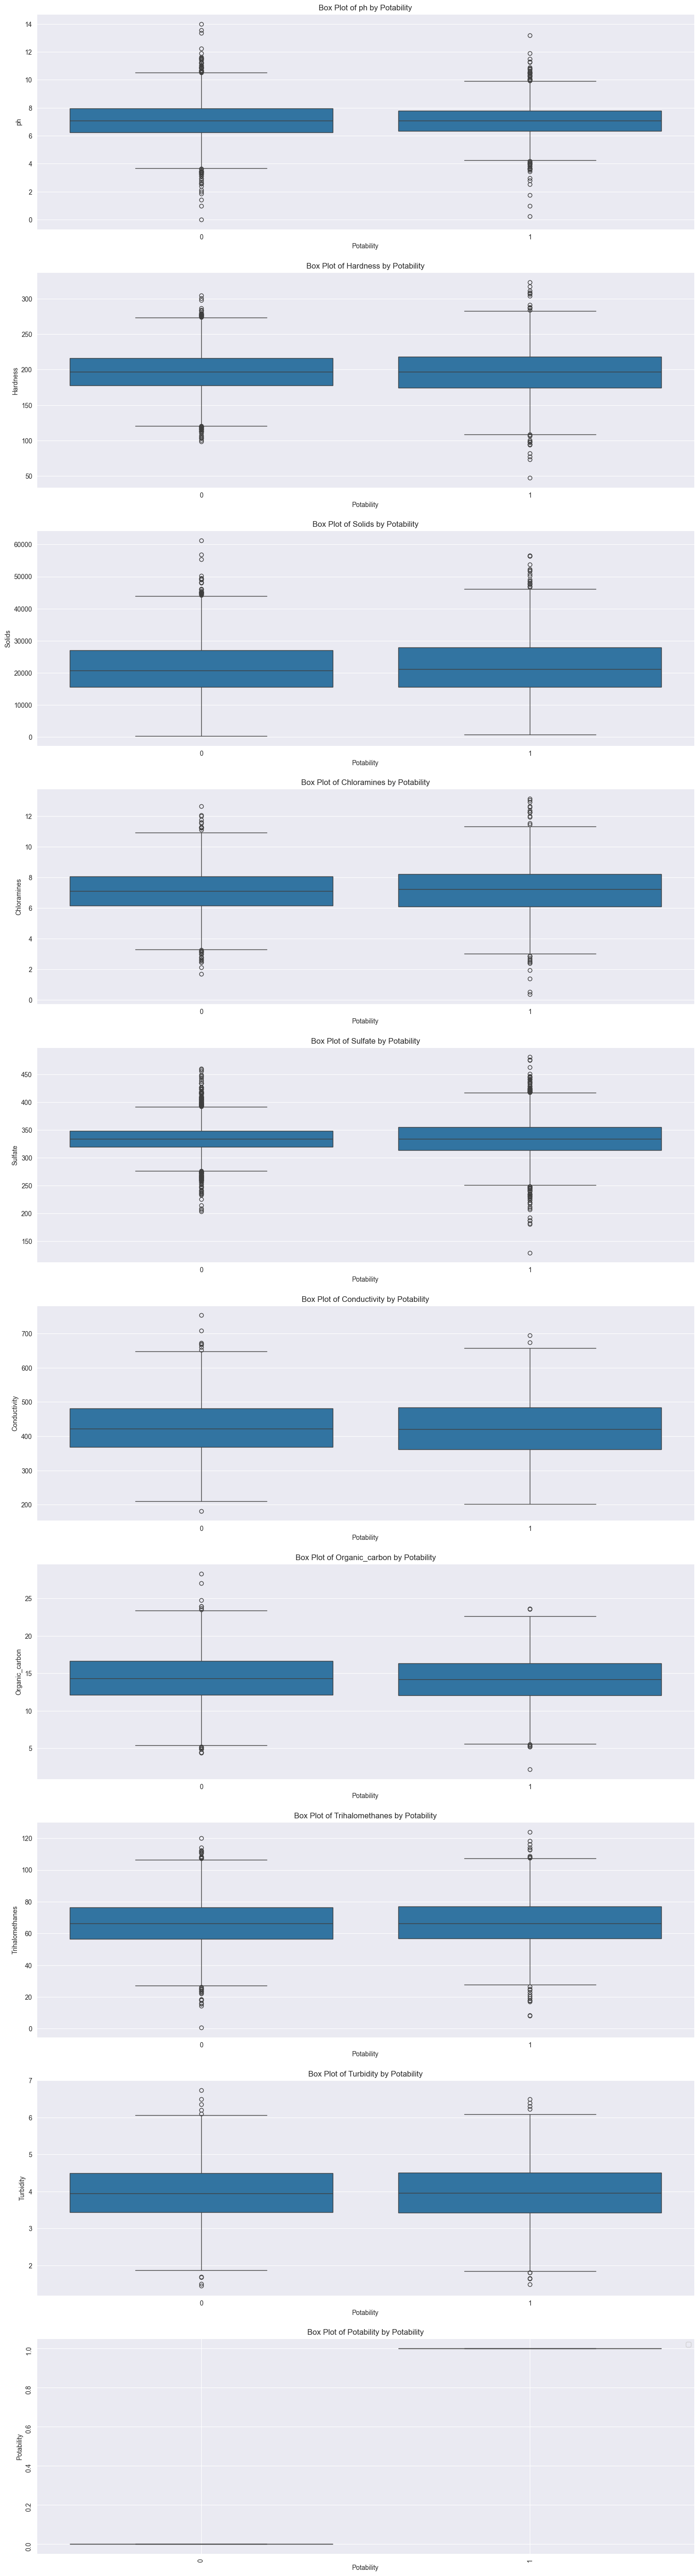

In [32]:
fig, axes = plt.subplots(figsize=(18,70), nrows=len(columns), ncols=1,)
for i, column in enumerate(columns):
    ax =  axes[i]
    sns.boxplot(x="Potability", y=column, data=df, ax=ax)
    ax.set_title(f"Box Plot of {column} by Potability")
    ax.set_xlabel("Potability")
    ax.set_ylabel(column)
    plt.xticks(rotation=90)  # Rotate x-axis labels
    plt.yticks(rotation=90)  # Rotate y-axis labels

plt.legend(loc='upper right')
plt.grid(True)
    

In [38]:
df['Hardness_Solids'] = df['Hardness'] * df['Solids']
df['Chloramines_Turbidity'] = df['Chloramines'] * df['Turbidity']
df['Conductivity_Hardness'] = df['Conductivity'] / df['Hardness']
df['Chloramines_Sulfate'] = df['Chloramines'] / (df['Sulfate'] + 1e-6)  # Avoid division by zero

In [39]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Hardness_Solids,Chloramines_Turbidity,Conductivity_Hardness,Chloramines_Sulfate
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,4.259943e+06,21.631516,2.754197,0.019810
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,2.411156e+06,29.862961,4.580992,0.019879
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,4.464441e+06,28.346486,1.866809,0.027791
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,4.720163e+06,37.304800,1.694550,0.022582
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,3.256022e+06,26.677889,2.199931,0.021109


In [40]:
df['ph_binned'] = pd.cut(df['ph'], bins=[0, 6, 7, 8, 14], labels=['Acidic', 'Neutral', 'Alkaline', 'Extreme'])

In [41]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Hardness_Solids,Chloramines_Turbidity,Conductivity_Hardness,Chloramines_Sulfate,ph_binned
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,4.259943e+06,21.631516,2.754197,0.019810,Alkaline
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,2.411156e+06,29.862961,4.580992,0.019879,Acidic
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,4.464441e+06,28.346486,1.866809,0.027791,Extreme
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,4.720163e+06,37.304800,1.694550,0.022582,Extreme
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,3.256022e+06,26.677889,2.199931,0.021109,Extreme


In [55]:
hot_encoded_df = pd.get_dummies(data=df,columns=["ph_binned"])

In [46]:
hot_encoded_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Hardness_Solids,Chloramines_Turbidity,Conductivity_Hardness,Chloramines_Sulfate,ph_binned_Acidic,ph_binned_Neutral,ph_binned_Alkaline,ph_binned_Extreme
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,4.259943e+06,21.631516,2.754197,0.019810,False,False,True,False
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,2.411156e+06,29.862961,4.580992,0.019879,True,False,False,False
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,4.464441e+06,28.346486,1.866809,0.027791,False,False,False,True
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,4.720163e+06,37.304800,1.694550,0.022582,False,False,False,True
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,3.256022e+06,26.677889,2.199931,0.021109,False,False,False,True


In [45]:
hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ph                     3276 non-null   float64
 1   Hardness               3276 non-null   float64
 2   Solids                 3276 non-null   float64
 3   Chloramines            3276 non-null   float64
 4   Sulfate                3276 non-null   float64
 5   Conductivity           3276 non-null   float64
 6   Organic_carbon         3276 non-null   float64
 7   Trihalomethanes        3276 non-null   float64
 8   Turbidity              3276 non-null   float64
 9   Potability             3276 non-null   int64  
 10  Hardness_Solids        3276 non-null   float64
 11  Chloramines_Turbidity  3276 non-null   float64
 12  Conductivity_Hardness  3276 non-null   float64
 13  Chloramines_Sulfate    3276 non-null   float64
 14  ph_binned_Acidic       3276 non-null   bool   
 15  ph_b

In [56]:
# convert True to 1 and False to 0 in hot encoded columns
for column in hot_encoded_df.columns:
    if column.startswith('ph_binned'):
        hot_encoded_df[column] = hot_encoded_df[column].astype(int)

In [57]:
hot_encoded_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Hardness_Solids,Chloramines_Turbidity,Conductivity_Hardness,Chloramines_Sulfate,ph_binned_Acidic,ph_binned_Neutral,ph_binned_Alkaline,ph_binned_Extreme
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,4.259943e+06,21.631516,2.754197,0.019810,0,0,1,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,2.411156e+06,29.862961,4.580992,0.019879,1,0,0,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,4.464441e+06,28.346486,1.866809,0.027791,0,0,0,1
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,4.720163e+06,37.304800,1.694550,0.022582,0,0,0,1
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,3.256022e+06,26.677889,2.199931,0.021109,0,0,0,1


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import svm

In [52]:
df.isna().sum()

ph                       0
Hardness                 0
Solids                   0
Chloramines              0
Sulfate                  0
Conductivity             0
Organic_carbon           0
Trihalomethanes          0
Turbidity                0
Potability               0
Hardness_Solids          0
Chloramines_Turbidity    0
Conductivity_Hardness    0
Chloramines_Sulfate      0
ph_binned                1
dtype: int64

In [58]:
X = hot_encoded_df.drop(["Potability"], axis=1)
y = hot_encoded_df["Potability"]
"""
poly = PolynomialFeatures(degree= 2, interaction_only=True)
poly_X = poly.fit_transform(X)
poly_X[:5]
"""

'\npoly = PolynomialFeatures(degree= 2, interaction_only=True)\npoly_X = poly.fit_transform(X)\npoly_X[:5]\n'

In [60]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SVM MODEL**

In [ ]:
svm_model = svm.SVC

**RANDOM FOREST MODEL**

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [73]:
# Create the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [ 200, 250],                  # Reduced number of trees in the forest
    'max_depth': [12, 15] ,                # Limited maximum depth options
    'min_samples_split': [2, 10],                # Fewer options for minimum samples to split
    'min_samples_leaf': [1, 4],                  # Reduced options for minimum samples at leaf
    'max_features': ['sqrt'],                     # Focusing on one feature selection method
    'bootstrap': [True],                          # Only using bootstrap samples
    'class_weight': ['balanced'],                 # Using only balanced class weights
}


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'max_depth': [12, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10],
                         'n_estimators': [200, 250]},
             scoring='accuracy', verbose=1)

In [74]:
best_estimator = grid_search.best_estimator_

In [ ]:
y_pred = best_estimator.predict(X_train)

print(classification_report(y_train, y_pred))
print("Train Accuracy:", accuracy_score(y_train, y_pred))
print("Confusion Matrix:", confusion_matrix(y_train, y_pred))